In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('Wine_clust.csv') #loading the data

In [3]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# EDA & VISUALIZATION

In [4]:
data.isna().sum()  #finding the null values present

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [5]:
data.columns #columns in the dataset

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [6]:
data.dtypes #finding the datatypes 

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

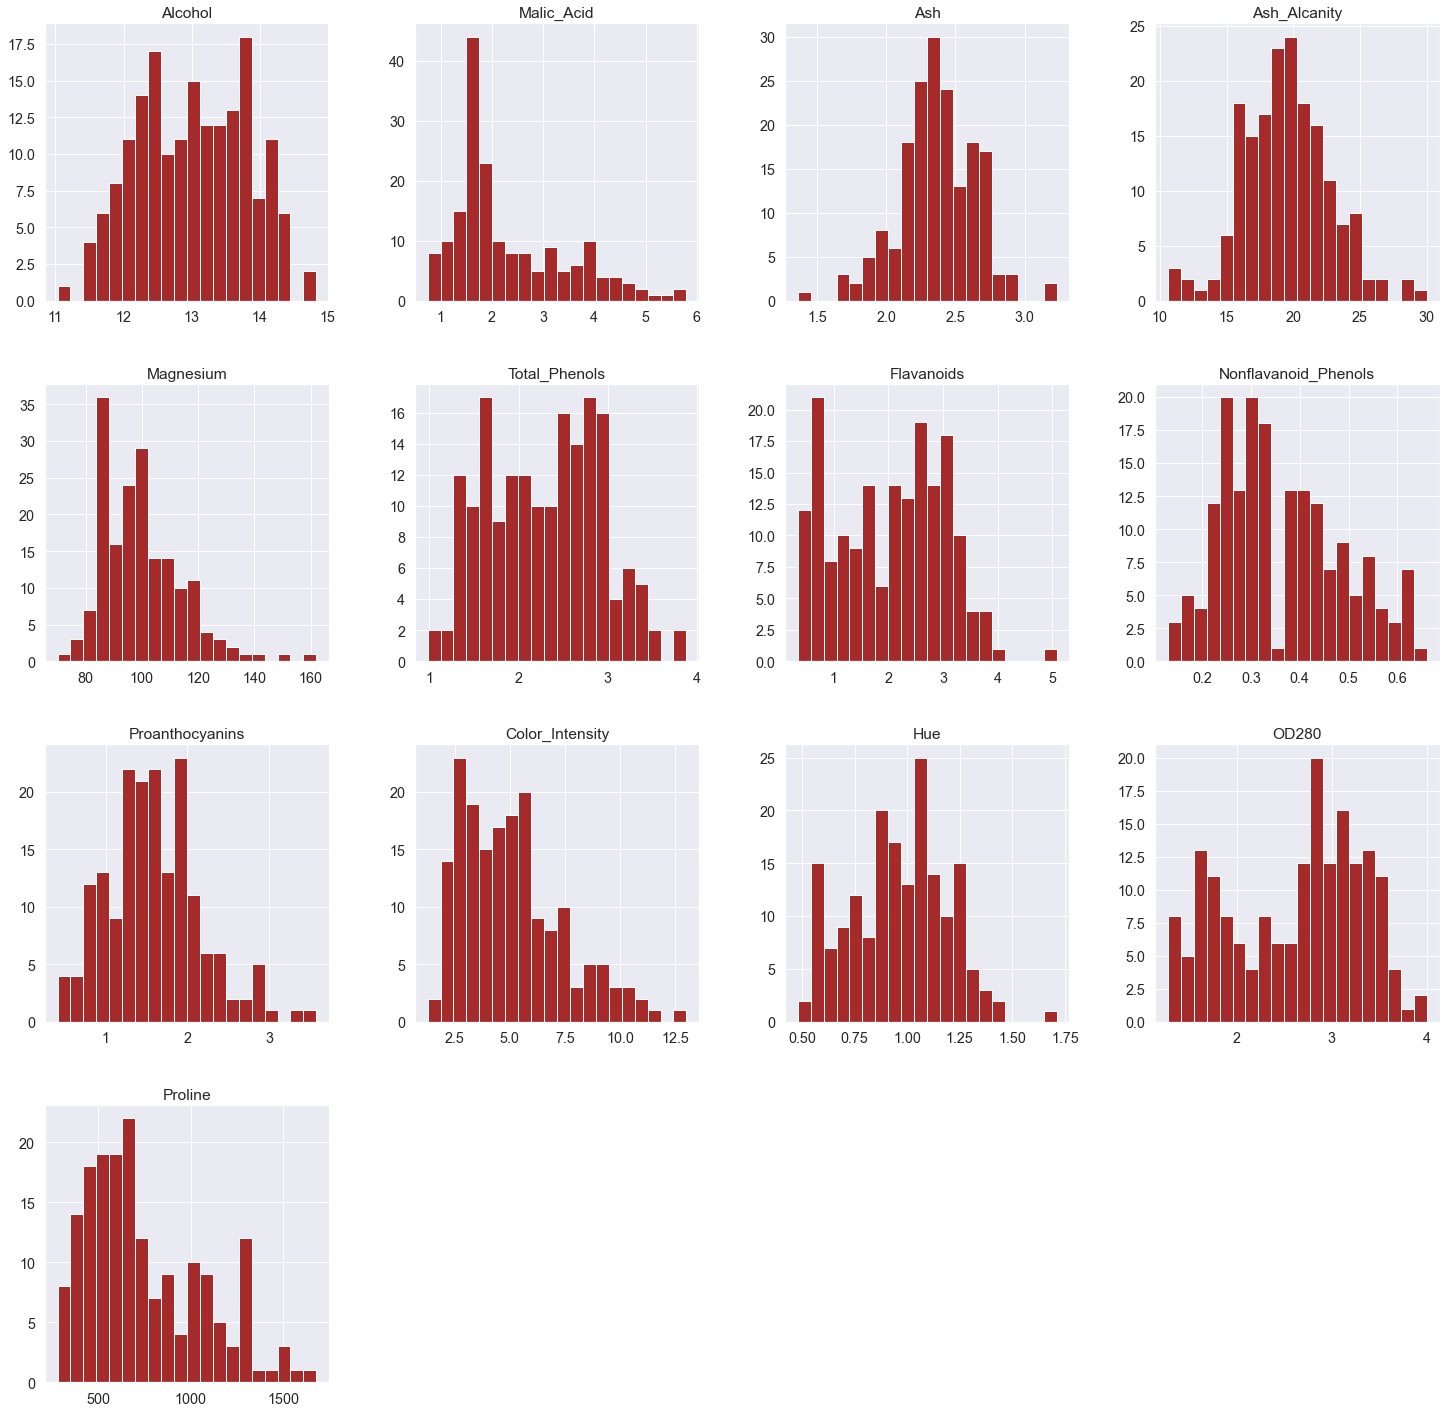

In [7]:
#Quick overview of the range of values in each column in the dataset
sns.set(style='darkgrid',font_scale=1.3, rc={'figure.figsize':(25,25)})
ax=data.hist(bins=20,color='brown' )

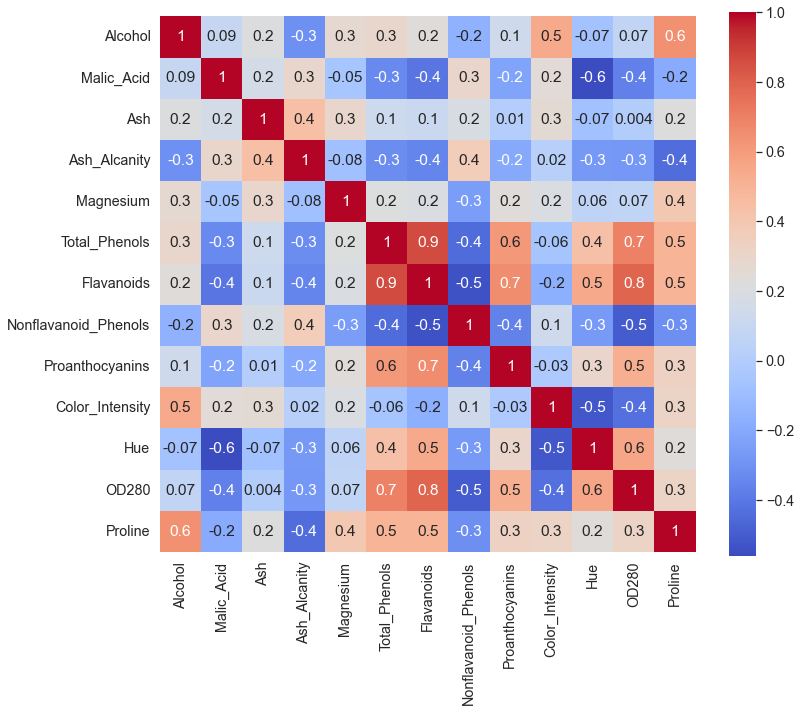

In [8]:
#plotting the corelation of different columns
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), cmap="coolwarm", annot=True, fmt='.1g' ,square=True);

# Model Building

# Kmeans Clustering

In [9]:
from sklearn.cluster import KMeans

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


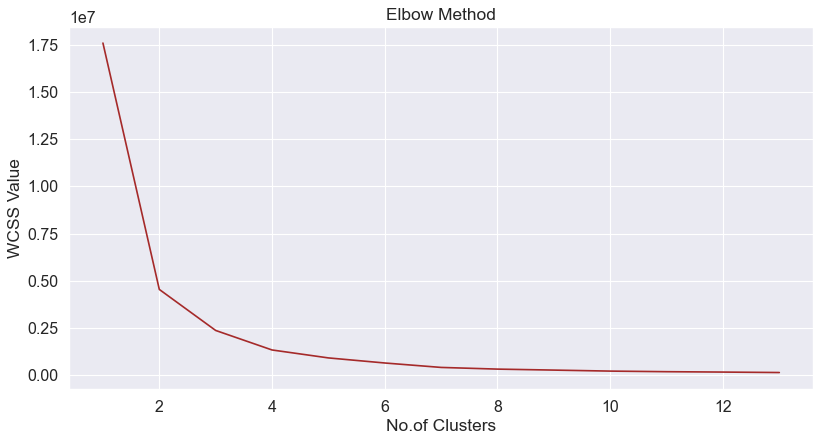

In [10]:
wcss=[]
for i in range (1,14):
    kmeans= KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(range(1,14),wcss,color='brown')
plt.title('Elbow Method')
plt.xlabel('No.of Clusters')
plt.ylabel('WCSS Value')
plt.show()

In [11]:
kmeans= KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans=kmeans.fit_predict(data)

In [12]:
y_kmeans

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0])

In [13]:
from sklearn.metrics import silhouette_score

In [14]:
sil_avg=silhouette_score(data,y_kmeans)
print(sil_avg)

0.571138193786884


### Agglomerative HC

In [22]:
import scipy.cluster.hierarchy as sch

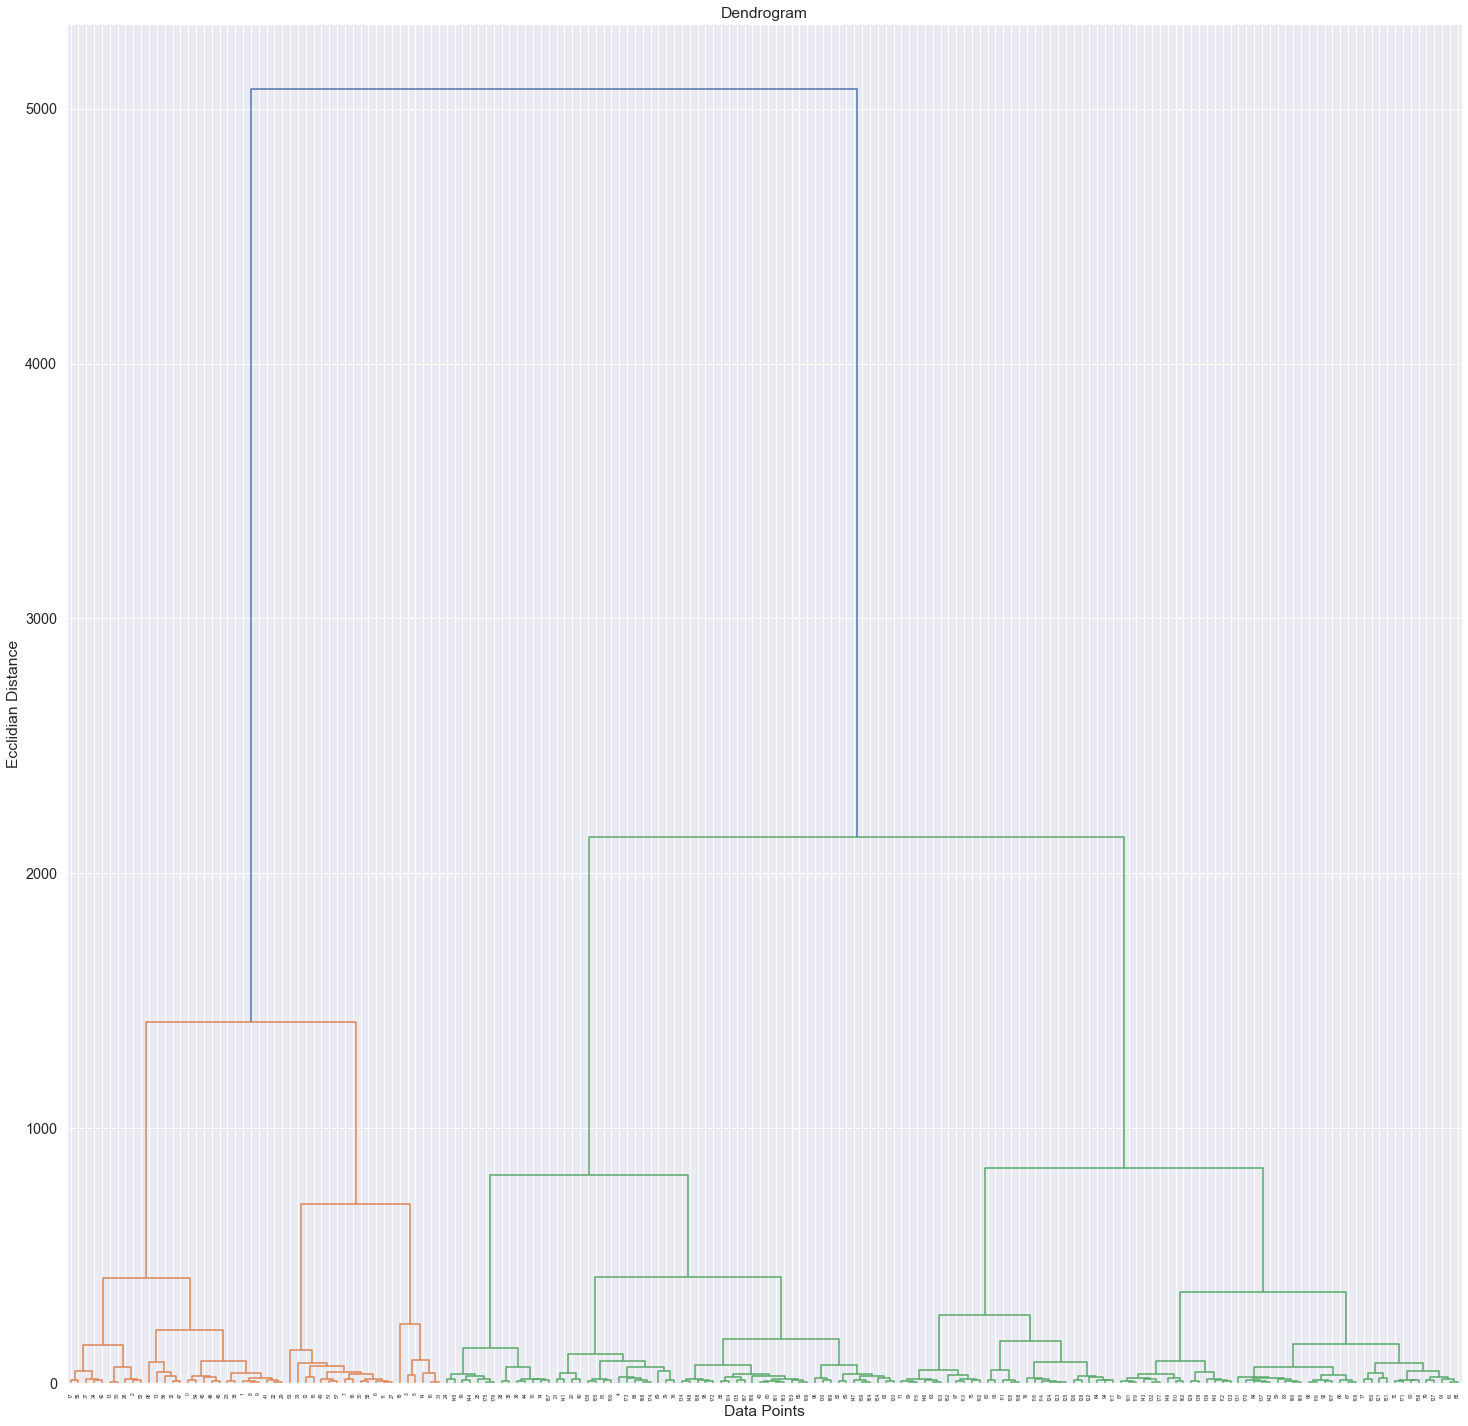

In [27]:

dendogram=sch.dendrogram(sch.linkage(data,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Ecclidian Distance')
plt.show()

In [28]:
from sklearn.cluster import AgglomerativeClustering

In [29]:
hc=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(data)

In [30]:
y_hc

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [31]:
from sklearn.metrics import silhouette_score

In [32]:
sil_avg=silhouette_score(data,y_hc)
print(sil_avg)

0.6587292996216912


## DBSCAN 

In [ ]:
#dbscan is done after scaling and dimensionality reduction for better results

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

In [46]:
# Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)
  
# Normalizing the data so that 
# the data approximately follows a Gaussian distribution
X_normalized = normalize(X_scaled)
  
# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

In [48]:
from sklearn.decomposition import PCA

In [77]:
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
print(X_principal.head())

         P1        P2
0 -0.832433 -0.318834
1 -0.639443  0.091947
2 -0.756882 -0.243317
3 -0.805447 -0.510057
4 -0.373903 -0.311604


In [88]:
from sklearn.cluster import DBSCAN

In [104]:
# Numpy array of all the cluster labels assigned to each data point
y_db = DBSCAN(eps = .03, min_samples =3).fit(X_principal)
labels = y_db.labels_

In [105]:
y_db

DBSCAN(eps=0.03, min_samples=3)

In [106]:
labels

array([ 2, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,  1,  2, -1, -1,
       -1, -1, -1,  0, -1, -1, -1, -1, -1,  1, -1,  1, -1, -1,  3, -1, -1,
       -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        0,  2, -1, -1,  3,  2,  3,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  4,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  4, -1, -1, -1, -1, -1,
        4, -1, -1, -1, -1, -1, -1, -1, -1,  4, -1, -1,  6, -1, -1, -1,  5,
       -1,  5,  5, -1,  5,  6,  5, -1, -1, -1,  5, -1, -1, -1, -1, -1, -1,
       -1,  6, -1, -1, -1, -1, -1,  7, -1,  7, -1, -1, -1, -1, -1,  8, -1,
       -1,  7,  8, -1, -1, -1,  8, -1], dtype=int64)